In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

C:\Users\po7517\Anaconda3\envs\new_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\po7517\Anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\po7517\Anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """

    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals, polynomial_array

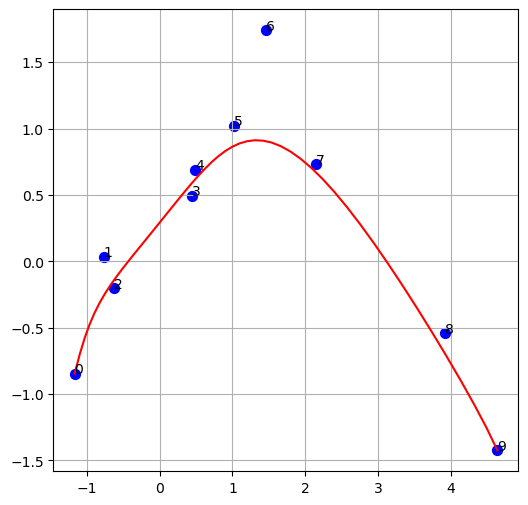

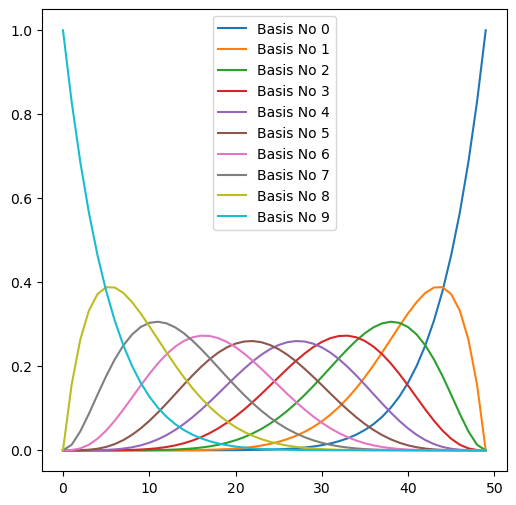

In [30]:
np.random.seed(0)
nPoints = 10
x = np.sort(np.random.uniform(-5, 5, size=nPoints))
y = np.sin(x) + 0.5* np.random.randn(nPoints)
points = np.vstack((x, y)).T
xpoints = [p[0] for p in points]
ypoints = [p[1] for p in points]

xvals, yvals, bases = bezier_curve(points, nTimes=50)

fig, axs = plt.subplots(1, 1, figsize=(6.,6.))
axs.scatter(xpoints, ypoints, c='b', marker='o', s=50)
for nr in range(len(points)):
    axs.text(points[nr][0], points[nr][1], nr)
axs.plot(xvals, yvals, c='r')
plt.grid()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(6.,6.))
for i in range (len(bases)):
    axs.plot(bases[i], label=f'Basis No {i}')
plt.legend()
plt.show()

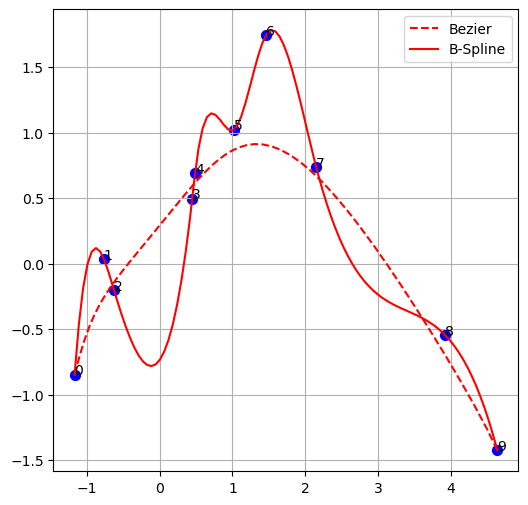

In [38]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# x = np.array([ 0. ,  1.2,  1.9,  3.2,  4. ,  6.5])
# y = np.array([ 0. ,  2.3,  3. ,  4.3,  2.9,  3.1])

t, c, k = interpolate.splrep(x, y, s=0, k=3)
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

fig, axs = plt.subplots(1, 1, figsize=(6.,6.))
axs.scatter(xpoints, ypoints, c='b', marker='o', s=50)
for nr in range(len(points)):
    axs.text(points[nr][0], points[nr][1], nr)
axs.plot(xvals, yvals, c='r', ls='--', label='Bezier')
axs.plot(xx, spline(xx), 'r', label='B-Spline')
axs.grid()
plt.legend()
plt.show()

In [154]:
import matplotlib as mpl
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def bernstein_poly(i, n, t):
    return comb(n, i) * (t**(n - i)) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])
    zPoints = np.array([p[2] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array(
        [bernstein_poly(i, nPoints - 1, t) for i in range(0, nPoints)])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)
    zvals = np.dot(zPoints, polynomial_array)

    return xvals, yvals, zvals

In [157]:
%matplotlib qt5
nPoints = 10
points = np.random.rand(nPoints, 3) * 200
xpoints = [p[0] for p in points]
ypoints = [p[1] for p in points]
zpoints = [p[2] for p in points]

xvals, yvals, zvals = bezier_curve(points, nTimes=1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot (111, projection="3d")
ax.plot(xvals, yvals, zvals, label='bezier')
ax.plot(xpoints, ypoints, zpoints, "ro")
for nr in range(len(points)):
    ax.text(points[nr][0], points[nr][1], points[nr][2], nr)

plt.show()

In [101]:
yPoints

array([0.71518937, 0.54488318, 0.64589411])

In [102]:
polynomial_array.shape

(3, 10)

In [104]:
polynomial_array

array([[0.        , 0.01234568, 0.04938272, 0.11111111, 0.19753086,
        0.30864198, 0.44444444, 0.60493827, 0.79012346, 1.        ],
       [0.        , 0.19753086, 0.34567901, 0.44444444, 0.49382716,
        0.49382716, 0.44444444, 0.34567901, 0.19753086, 0.        ],
       [1.        , 0.79012346, 0.60493827, 0.44444444, 0.30864198,
        0.19753086, 0.11111111, 0.04938272, 0.01234568, 0.        ]])

In [103]:
t

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

C:\Users\po7517\AppData\Local\Temp\ipykernel_4384\1661265988.py:37: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('B-spline', 'Control points')


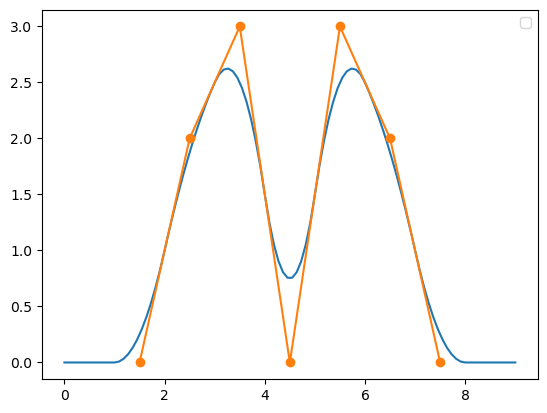

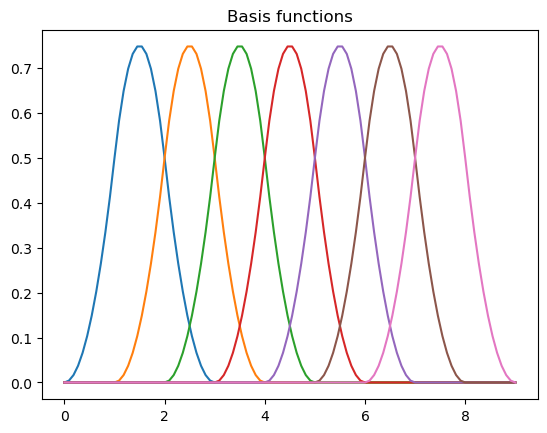

In [109]:
import numpy

import matplotlib.pyplot as plt

# This is the basis function described in eq 3.6 in http://research.microsoft.com/en-us/um/people/ablake/contours/
def func(x, offset):
    out = numpy.ndarray((len(x)))

    for i, v in enumerate(x):
        s = v - offset

        if s >= 0 and s < 1:
            out[i] = s * s / 2.0
        elif s >= 1 and s < 2:
            out[i] = 3.0 / 4.0 - (s - 3.0 / 2.0) * (s - 3.0 / 2.0)
        elif s >= 2 and s < 3:
            out[i] = (s - 3.0) * (s - 3.0) / 2.0
        else:
            out[i] = 0.0

    return out

# We have 7 things to fit, so let's do 7 basis functions?
y = numpy.array([0, 2, 3, 0, 3, 2, 0])

# We need enough x points for all the basis functions... That's why the weird linspace max here
x = numpy.linspace(0, len(y) + 2, 100)

B = numpy.ndarray((len(x), len(y)))

for k in range(len(y)):
    B[:, k] = func(x, k)

plt.plot(x, B.dot(y))
# The x values in the next statement are the maximums of each basis function. I'm not sure at all this is right
plt.plot(numpy.array(range(len(y))) + 1.5, y, '-o')
plt.legend('B-spline', 'Control points')
plt.show()

for k in range(len(y)):
    plt.plot(x, B[:, k])
plt.title('Basis functions')
plt.show()